<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/windelta_netflow_summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install energyquantified

     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 227 kB 20.5 MB/s 
     |████████████████████████████████| 61 kB 7.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
from datetime import datetime, time

In [7]:
day_ahead_zero = EQ.timeseries.load(
   'NO1 Wind Power Production MWh/h H Actual',
   begin='2021-03-01',
   end='2021-07-31',
   frequency=Frequency.PT1H
)
day_ahead_zero = day_ahead_zero.to_dataframe()

In [8]:
day_ahead_zero

,NO1 Wind Power Production MWh/h H Actual
,
,
date,
2021-03-01 00:00:00+01:00,35
2021-03-01 01:00:00+01:00,43
2021-03-01 02:00:00+01:00,58
2021-03-01 03:00:00+01:00,94
2021-03-01 04:00:00+01:00,86
...,...
2021-07-30 19:00:00+02:00,28


In [9]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'NO1 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2021, 3, 1, 0, 0, 0),
   end=dtdatetime(2021, 7, 31, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [10]:
day_ahead_twelve

,NO1 Wind Power Production MWh/h 15min Forecast
,
,
date,
2021-03-01 00:00:00+01:00,25.80
2021-03-01 01:00:00+01:00,34.05
2021-03-01 02:00:00+01:00,54.73
2021-03-01 03:00:00+01:00,76.03
2021-03-01 04:00:00+01:00,87.90
...,...
2021-07-30 19:00:00+02:00,28.35


In [11]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,NO1 Wind Power Production MWh/h H Actual,NO1 Wind Power Production MWh/h 15min Forecast
,,
,,
date,,
2021-03-01 00:00:00+01:00,35,25.80
2021-03-01 01:00:00+01:00,43,34.05
2021-03-01 02:00:00+01:00,58,54.73
2021-03-01 03:00:00+01:00,94,76.03
2021-03-01 04:00:00+01:00,86,87.90
...,...,...
2021-07-30 19:00:00+02:00,28,28.35


In [12]:
df_comb.columns

MultiIndex([(      'NO1 Wind Power Production MWh/h H Actual', '', ''),
            ('NO1 Wind Power Production MWh/h 15min Forecast', '', '')],
           )

In [13]:
df_comb['Wind Delta', '', '']= df_comb['NO1 Wind Power Production MWh/h H Actual',''] - df_comb['NO1 Wind Power Production MWh/h 15min Forecast','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [14]:
df_comb

,NO1 Wind Power Production MWh/h H Actual,NO1 Wind Power Production MWh/h 15min Forecast,Wind Delta
,,,
,,,
date,,,
2021-03-01 00:00:00+01:00,35,25.80,9.20
2021-03-01 01:00:00+01:00,43,34.05,8.95
2021-03-01 02:00:00+01:00,58,54.73,3.27
2021-03-01 03:00:00+01:00,94,76.03,17.97
2021-03-01 04:00:00+01:00,86,87.90,-1.90
...,...,...,...
2021-07-30 19:00:00+02:00,28,28.35,-0.35


In [15]:
df_comb.columns

MultiIndex([(      'NO1 Wind Power Production MWh/h H Actual', '', ''),
            ('NO1 Wind Power Production MWh/h 15min Forecast', '', ''),
            (                                    'Wind Delta', '', '')],
           )

In [16]:
df_comb.drop(['NO1 Wind Power Production MWh/h H Actual', 'NO1 Wind Power Production MWh/h 15min Forecast'], axis=1, level=0 ,inplace=True)
df_comb

,Wind Delta
,
,
date,
2021-03-01 00:00:00+01:00,9.20
2021-03-01 01:00:00+01:00,8.95
2021-03-01 02:00:00+01:00,3.27
2021-03-01 03:00:00+01:00,17.97
2021-03-01 04:00:00+01:00,-1.90
...,...
2021-07-30 19:00:00+02:00,-0.35


In [17]:
NO1_Spot = EQ.timeseries.load(
   'NO1 Price Spot EUR/MWh NordPool H Actual',
   begin='2021-03-01',
   end='2021-07-31',
   frequency=Frequency.PT1H
)
NO1_Spot = NO1_Spot.to_dataframe()
NO1_Spot

,NO1 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2021-03-01 00:00:00+01:00,34.96
2021-03-01 01:00:00+01:00,34.91
2021-03-01 02:00:00+01:00,34.74
2021-03-01 03:00:00+01:00,34.79
2021-03-01 04:00:00+01:00,34.91
...,...
2021-07-30 19:00:00+02:00,59.18


In [18]:
NO1_Imb = EQ.timeseries.load(
   'NO1 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2021-03-01',
   end='2021-07-31',
   frequency=Frequency.PT1H
)
NO1_Imb = NO1_Imb.to_dataframe()
NO1_Imb

,NO1 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2021-03-01 00:00:00+01:00,41.34
2021-03-01 01:00:00+01:00,42.30
2021-03-01 02:00:00+01:00,41.34
2021-03-01 03:00:00+01:00,41.34
2021-03-01 04:00:00+01:00,41.00
...,...
2021-07-30 19:00:00+02:00,59.18


In [19]:
df_comb_spread = pd.merge(NO1_Spot, NO1_Imb , left_index=True, right_index=True, how='inner')
df_comb_spread

,NO1 Price Spot EUR/MWh NordPool H Actual,NO1 Price Imbalance Consumption EUR/MWh H Actual
,,
,,
date,,
2021-03-01 00:00:00+01:00,34.96,41.34
2021-03-01 01:00:00+01:00,34.91,42.30
2021-03-01 02:00:00+01:00,34.74,41.34
2021-03-01 03:00:00+01:00,34.79,41.34
2021-03-01 04:00:00+01:00,34.91,41.00
...,...,...
2021-07-30 19:00:00+02:00,59.18,59.18


In [20]:
df_comb_spread['Direction', '', '']= df_comb_spread['NO1 Price Spot EUR/MWh NordPool H Actual',''] - df_comb_spread['NO1 Price Imbalance Consumption EUR/MWh H Actual','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [21]:
df_comb_spread

,NO1 Price Spot EUR/MWh NordPool H Actual,NO1 Price Imbalance Consumption EUR/MWh H Actual,Direction
,,,
,,,
date,,,
2021-03-01 00:00:00+01:00,34.96,41.34,-6.38
2021-03-01 01:00:00+01:00,34.91,42.30,-7.39
2021-03-01 02:00:00+01:00,34.74,41.34,-6.60
2021-03-01 03:00:00+01:00,34.79,41.34,-6.55
2021-03-01 04:00:00+01:00,34.91,41.00,-6.09
...,...,...,...
2021-07-30 19:00:00+02:00,59.18,59.18,0.00


In [22]:
df_comb_spread.drop(['NO1 Price Spot EUR/MWh NordPool H Actual', 'NO1 Price Imbalance Consumption EUR/MWh H Actual'], axis=1, level=0 ,inplace=True)
df_comb_spread

,Direction
,
,
date,
2021-03-01 00:00:00+01:00,-6.38
2021-03-01 01:00:00+01:00,-7.39
2021-03-01 02:00:00+01:00,-6.60
2021-03-01 03:00:00+01:00,-6.55
2021-03-01 04:00:00+01:00,-6.09
...,...
2021-07-30 19:00:00+02:00,0.00


In [23]:
NO1_import = EQ.timeseries.load(
   'NO1 Exchange Physical Flow Net Import MWh/h H Actual',
   begin='2021-03-01',
   end='2021-07-31',
   frequency=Frequency.PT1H
)
NO1_import = NO1_import.to_dataframe()
NO1_import

,NO1 Exchange Physical Flow Net Import MWh/h H Actual
,
,
date,
2021-03-01 00:00:00+01:00,2261
2021-03-01 01:00:00+01:00,2247
2021-03-01 02:00:00+01:00,2128
2021-03-01 03:00:00+01:00,2039
2021-03-01 04:00:00+01:00,2133
...,...
2021-07-30 19:00:00+02:00,784


In [24]:
df_comb_net = pd.merge(df_comb, NO1_import, left_index=True, right_index=True, how='inner')
df_comb_net

,Wind Delta,NO1 Exchange Physical Flow Net Import MWh/h H Actual
,,
,,
date,,
2021-03-01 00:00:00+01:00,9.20,2261
2021-03-01 01:00:00+01:00,8.95,2247
2021-03-01 02:00:00+01:00,3.27,2128
2021-03-01 03:00:00+01:00,17.97,2039
2021-03-01 04:00:00+01:00,-1.90,2133
...,...,...
2021-07-30 19:00:00+02:00,-0.35,784


In [25]:
df_comb_net['Net', '', '']= df_comb_net['NO1 Exchange Physical Flow Net Import MWh/h H Actual',''] + df_comb_net['Wind Delta','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [26]:
df_comb_net

,Wind Delta,NO1 Exchange Physical Flow Net Import MWh/h H Actual,Net
,,,
,,,
date,,,
2021-03-01 00:00:00+01:00,9.20,2261,2270.20
2021-03-01 01:00:00+01:00,8.95,2247,2255.95
2021-03-01 02:00:00+01:00,3.27,2128,2131.27
2021-03-01 03:00:00+01:00,17.97,2039,2056.97
2021-03-01 04:00:00+01:00,-1.90,2133,2131.10
...,...,...,...
2021-07-30 19:00:00+02:00,-0.35,784,783.65


In [27]:
df_comb_net.drop(['Wind Delta', 'NO1 Exchange Physical Flow Net Import MWh/h H Actual'], axis=1, level=0 ,inplace=True)
df_comb_net

,Net
,
,
date,
2021-03-01 00:00:00+01:00,2270.20
2021-03-01 01:00:00+01:00,2255.95
2021-03-01 02:00:00+01:00,2131.27
2021-03-01 03:00:00+01:00,2056.97
2021-03-01 04:00:00+01:00,2131.10
...,...
2021-07-30 19:00:00+02:00,783.65


In [28]:
df_plot = pd.merge(df_comb_net, df_comb_spread, left_index=True, right_index=True, how='inner')
df_plot 

,Net,Direction
,,
,,
date,,
2021-03-01 00:00:00+01:00,2270.20,-6.38
2021-03-01 01:00:00+01:00,2255.95,-7.39
2021-03-01 02:00:00+01:00,2131.27,-6.60
2021-03-01 03:00:00+01:00,2056.97,-6.55
2021-03-01 04:00:00+01:00,2131.10,-6.09
...,...,...
2021-07-30 19:00:00+02:00,783.65,0.00


In [29]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

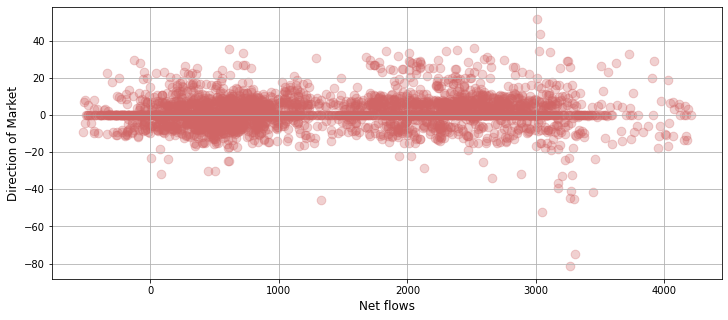

In [30]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Net'],
            y=df_plot['Direction'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Net flows", fontsize=12),
plt.ylabel("Direction of Market", fontsize=12);

plt.autoscale();
